In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,6,Female,45,19,42
1,7,Male,33,24,67
2,8,Female,22,60,55
3,9,Female,51,78,21
4,10,Male,29,33,79


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,100.000000,100.000000,100.000000,100.000000
mean,55.500000,39.880000,54.520000,49.460000
std,29.011492,14.520122,28.488339,24.339111
min,6.000000,18.000000,15.000000,9.000000
25%,30.750000,27.750000,27.750000,27.750000
50%,55.500000,38.000000,53.500000,50.000000
75%,80.250000,51.000000,74.500000,69.250000
max,105.000000,70.000000,120.000000,99.000000


drop any categorial column

In [5]:
df_copy = df.drop(columns=["Gender"])

In [6]:
df_copy.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,6,45,19,42
1,7,33,24,67
2,8,22,60,55
3,9,51,78,21
4,10,29,33,79


In [7]:
df_copy.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace=True)

Select features for clustering (X)

In [8]:
X = df_copy[["Age", "Annual Income", "Spending Score"]] # adding features

In [9]:
X.head()

,Age,Annual Income,Spending Score
0,45,19,42
1,33,24,67
2,22,60,55
3,51,78,21
4,29,33,79


Scale features (VERY important for K-Means distance)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

basic plot to see spending scores on original data

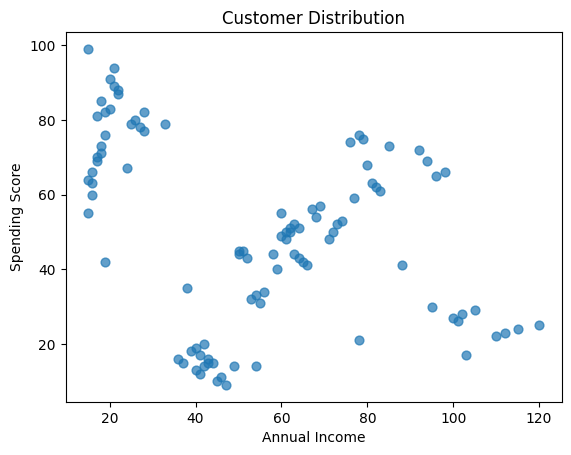

In [11]:
plt.scatter(
    X['Annual Income'],
    X['Spending Score'],
    s=40,
    alpha=0.7
)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Distribution")
plt.show()

I think,l there can be 4 clusters, so making 4 clusters for now

In [12]:
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)

In [13]:
labels = kmeans.fit_predict(X_scaled)

In [14]:
df_result = X.copy()
df_result["Cluster"] = labels
print(df_result.head())

   Age  Annual Income  Spending Score  Cluster
0   45             19              42        2
1   33             24              67        1
2   22             60              55        3
3   51             78              21        0
4   29             33              79        1


grouping my clusters

In [15]:
df_result.groupby("Cluster").mean()

,Age,Annual Income,Spending Score
Cluster,,,
0,41.083333,102.416667,26.083333
1,24.074074,20.481481,77.333333
2,58.714286,45.214286,24.000000
3,36.393939,72.848485,56.757576


from the above results:-

Cluster 0: Older customers, high income, low spending

Cluster 1: Young customers, medium income, high spending

Cluster 2: Older customers, low income, moderate spending

Cluster 3: Young customers, high income, medium spending

plotting graph with my 4 custom clusters

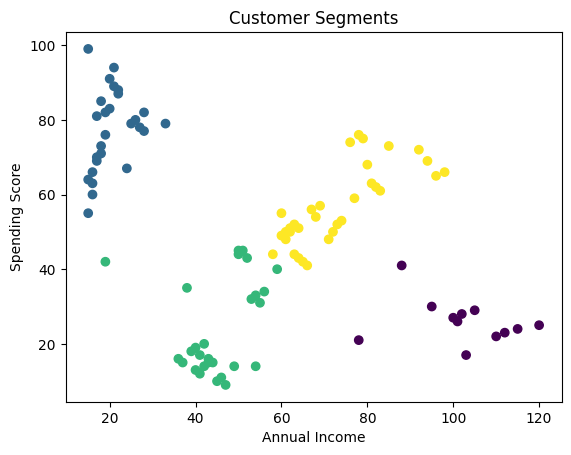

In [16]:
plt.scatter(
    df_result["Annual Income"],
    df_result["Spending Score"],
    c=df_result["Cluster"],
    cmap="viridis"
)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

see the centroids of each cluster

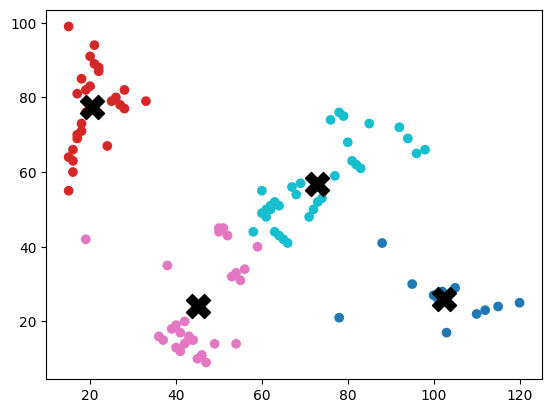

In [17]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_) #Convert centroids back to original units

plt.scatter(
    df_result["Annual Income"],
    df_result["Spending Score"],
    c=df_result["Cluster"],
    cmap="tab10"
)

#Plot centroids on top
plt.scatter(
    centroids[:,1],
    centroids[:,2],
    
    #Marker styling
    s=300,
    marker='X',
    color='black'
)

plt.show()

with k = 4 is a visual guess. The next proper step is to validate it with the Elbow Method.

In [18]:
# trying with 10 clusters now to see which could be the best
inertia_values = []

K_range = range(1, 11)

for k in K_range:
    
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=10,
        random_state=42
    )
    
    kmeans.fit(X_scaled)
    
    inertia_values.append(kmeans.inertia_)

In [19]:
inertia_values

[300.0,
 148.92418942082998,
 71.17884567549842,
 47.18577174725105,
 32.84769357946028,
 27.75224456991099,
 23.325067963683665,
 19.250334214683342,
 15.795065518194146,
 14.28429021703251]

plot the chart with the results

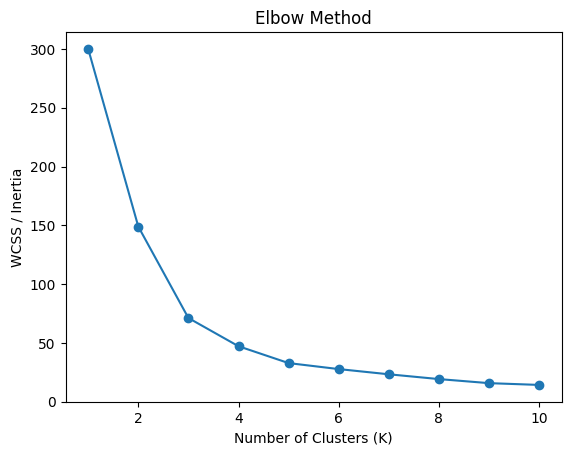

In [20]:
plt.plot(K_range, inertia_values, marker='o')

plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Method")

plt.show()

we got elbow at k=4 or 5

let's try with k = 5

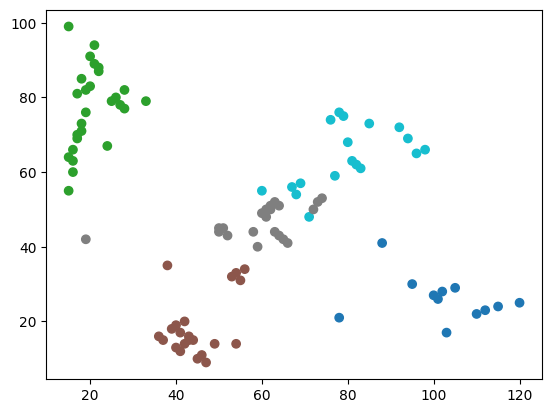

In [21]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df_result["Cluster"] = labels

plt.scatter(
    df_result["Annual Income"],
    df_result["Spending Score"],
    c=df_result["Cluster"],
    cmap="tab10"
)

plt.show()

see the centroids

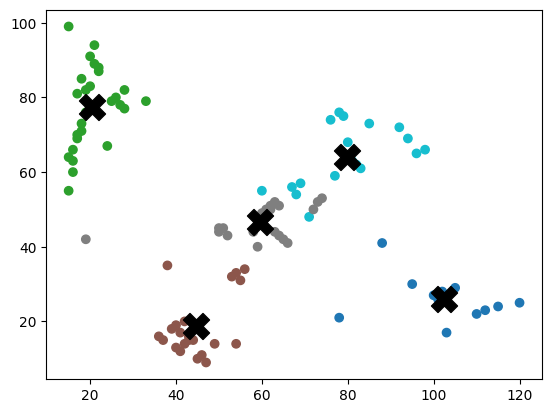

In [22]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(
    df_result["Annual Income"],
    df_result["Spending Score"],
    c=df_result["Cluster"],
    cmap="tab10"
)

plt.scatter(
    centroids[:,1],
    centroids[:,2],
    s=350,
    marker="X",
    color="black"
)

plt.show()